In [1]:
import fpdf
from fpdf import FPDF
from PyPDF2 import PdfFileWriter, PdfFileReader
import time
import pandas as pd
import dataframe_image as dfi
# libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, AutoDateLocator, ConciseDateFormatter
import seaborn as sns

In [2]:
report = pd.read_csv('exceles/out.csv', index_col = 0)

In [4]:
report.head(13)

,Month,P1,P2,P3,P4,P5,P6,Total_amount,Predict_amount
0,2020-11,0.000,0.000,0.000,266.996,6.712,45.046,318.754,340.000
1,2020-12,0.000,0.000,408.848,35.948,0.000,94.418,539.214,660.234
2,2021-01,0.000,0.000,405.864,28.788,0.000,80.099,514.751,590.751
3,2021-02,0.000,0.000,345.604,14.319,0.000,55.786,415.709,490.000
4,2021-03,0.000,0.000,0.000,303.988,2.088,49.969,356.045,380.900
5,2021-04,0.000,0.000,0.000,299.364,4.922,58.918,363.204,387.204
6,2021-05,0.000,598.281,66.525,0.000,0.000,71.746,736.552,606.552
7,2021-06,1528.890,1016.227,0.000,0.000,0.000,637.062,3182.179,800.179
8,2021-07,1794.991,1262.192,0.000,0.000,0.000,1005.040,4062.223,2302.223
9,2021-08,1712.655,1269.948,0.000,0.000,0.000,1085.437,4068.040,2698.040


In [3]:
report['Predict_amount'] = [ 340,660.234,590.751,490,380.9,387.204,606.552,800.179,2302.223,2698.040,1986.764,807.838,405.350]

Plot (Figure_1 & Figure_2)

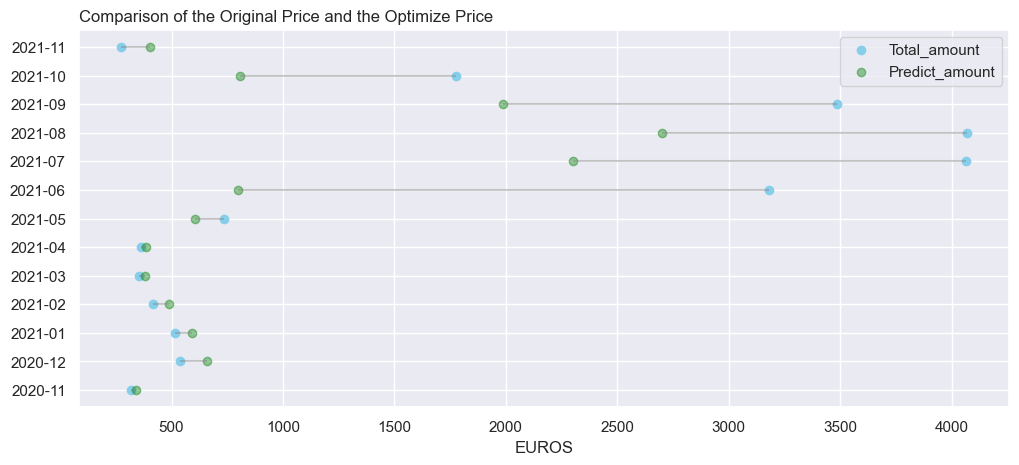

In [13]:
# Figure Size
sns.set_theme()
plt.figure(figsize=(12,5), dpi=100)
my_range=range(1,len(report.index)+1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=report['Total_amount'], xmax=report['Predict_amount'], color='grey', alpha=0.4)
plt.scatter(report['Total_amount'], my_range, color='skyblue', alpha=1, label='Total_amount')
plt.scatter(report['Predict_amount'], my_range, color='green', alpha=0.4 , label='Predict_amount')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, report['Month'])
plt.title("Comparison of the Original Price and the Optimize Price", loc='left')
plt.xlabel('EUROS')
#plt.ylabel('Group')
# As png
plt.savefig('pngs/Lollipop_plot_with2_groups.png')
# Show the graph
plt.show()


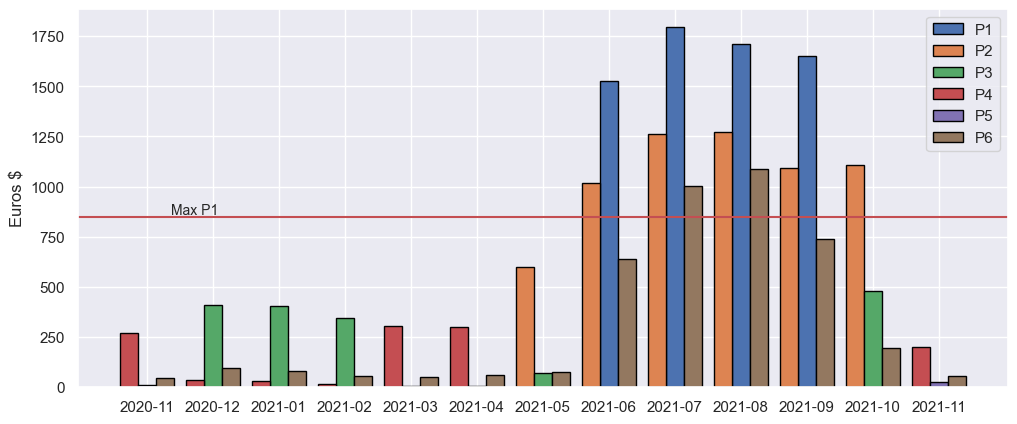

In [14]:
import numpy as np
# Figure Size
sns.set_theme()
sns.color_palette('pastel')
plt.figure(figsize=(12,5), dpi=100)
# width of the bars
barWidth = 0.27
 
# Choose the height of the blue bars
bars1 = report['P1']
bars2 = report['P2']
bars3 = report['P3']
bars4 = report['P4']
bars5 = report['P5']
bars6 = report['P6']
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create blue bars
plt.bar(r2, bars1, width = barWidth, edgecolor = 'black', capsize=7, label='P1')
# Create cyan bars
plt.bar(r1, bars2, width = barWidth, edgecolor = 'black', capsize=7, label='P2')
# Create cyan bars
plt.bar(r2, bars3, width = barWidth, edgecolor = 'black', capsize=7, label='P3')
# Create cyan bars
plt.bar(r1, bars4, width = barWidth, edgecolor = 'black', capsize=7, label='P4')
# Create cyan bars
plt.bar(r2, bars5, width = barWidth, edgecolor = 'black', capsize=7, label='P5')
# Create cyan bars
plt.bar(r3, bars6, width = barWidth, edgecolor = 'black', capsize=7, label='P6')
 
# specifying horizontal line type
plt.axhline(y = 850, color = 'r', linestyle = '-', gid = 'Max')
plt.text(1, 880, 'Max P1', fontsize=10, va='center', ha='center')

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], report['Month'])
plt.ylabel('Euros $')
plt.legend()

# As png
plt.savefig('pngs/comparative_barPlot.png')
# Show graphic
plt.show()

Cakes (Present, Future, Discount Percentage)

In [47]:
total_past = 1980
total_present = 1548

discount_perc = ((total_past - total_present) / (total_past)) * 100
str_discount = (str(round(discount_perc, 2)) + ' %')

AttributeError: 'AxesSubplot' object has no attribute 'set_fontweight'

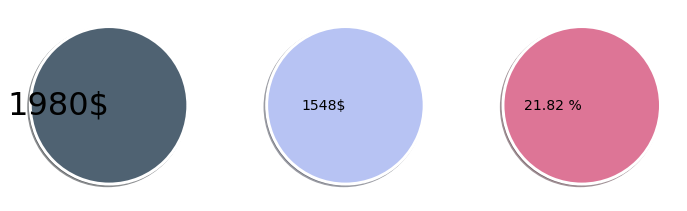

In [72]:
# create random data
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3, figsize = (12,12))
#plt.figure(figsize=(12,5), dpi=200)

name_1 = [str(total_past) + '$']; value_1 = [total_past]; color_1 = ['#4F6272']
name_2 = [str(total_present) + '$']; value_2 = [total_present]; color_2 = ['#B7C3F3']
name_3 = [str(round(discount_perc, 2)) + ' %']; value_3 = [round(discount_perc, 2)]; color_3 = ['#DD7596']

# Create a set of colors
colors = ['#8EB897']

#PIE_1
axis[0].pie(value_1, labels = name_1, shadow=True, colors=color_1, startangle=90, labeldistance = 0.0, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 32})
#axis[0].legend(labels = name_1, loc='lower center')
#PIE_2
axis[1].pie(value_2, labels = name_2, shadow=True, colors=color_2, labeldistance = 0.0, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 14})
#axis[1].legend(labels = name_2, loc='lower center')
#PIE_3
axis[2].pie(value_3, labels = name_3, shadow=True, colors=color_3, labeldistance = 0.0, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'fontsize': 14})
#axis[2].legend(labels = name_3, loc='lower center')
for text in axis:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')

plt.show();

In [73]:
# Scale all text labels using Seaborn's set()
sns.set(font_scale = 1.2)
plt.figure(figsize=(10, 10))

patches, texts = plt.pie(
    x=age_group_populations, labels=age_group_labels,
    colors=sns.color_palette('Set2'),
    startangle=90,
    # Bring labels inside the pie
    labeldistance=0.7
)

# iterate over the text labels
# make each label bold and center-aligned
for text in texts:
    text.set_fontweight('bold')
    text.set_horizontalalignment('center')

plt.show()

NameError: name 'age_group_populations' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

Report

In [34]:
parrafo_1 = """
Con la calculadora de potencia First_Light te asesoramos de manera sencilla y gratuita para\n 
que sepas cuántos kW realmente necesitas. La potencia contratada: es un coste fijo que\n 
depende de los kW contratados. Este gasto se repetirá mes a mes. Tú eliges si quieres contratar\n 
más o menos kW (y en consecuencia pagar más o menos).
"""

parrafo_2 = "Con la calculadora de potencia First_Light te asesoramos de manera sencilla y gratuita para que sepas cuántos kW realmente necesitas. La potencia contratada: es un coste fijo que depende de los kW contratados. Este gasto se repetirá mes a mes. Tú eliges si quieres contratar más o menos kW (y en consecuencia pagar más o menos)."

In [37]:
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', '', 10)

#Espacio para el Encabezado
pdf.cell(w=0, h=35, ln=1)

pdf.multi_cell(w=0, h=5, txt= parrafo_2)
pdf.set_font('Arial', 'B', 13)
pdf.cell(w=0, h=10, txt="Resumen Facura de la Luz.", ln=1)


pdf.set_font('Arial', '', 8)
#Image_1
pdf.image('pngs/Lollipop_plot_with2_groups.png', 
          x = 10, y = None, w = 200, h = 0, type = 'PNG')
pdf.cell(w=0, h=5, txt="Figure.1.", ln=1,
         align='C')
#Image_2
pdf.image('pngs/comparative_barPlot.png', 
          x = 10, y = None, w = 200, h = 0, type = 'PNG')
pdf.cell(w=0, h=5, txt="Figure.2.", ln=1,
         align='C')

pdf.set_font('Arial', '', 10) # Reset text back to regular

pdf.output(f'pdfs/business_report.pdf', 'F')
pdf.close()

OverLap (Header + Report)

In [38]:
overlay_pdf_file_name = 'pdfs/business_report.pdf'
pdf_template_file_name = 'pdfs/firstLight_header.pdf'
result_pdf_file_name = 'pdfs/Final_Report.pdf'

# Take the PDF you created above and overlay it on your template PDF
# Open your template PDF
pdf_template = PdfFileReader(open(pdf_template_file_name, 'rb'))
# Get the first page from the template
template_page = pdf_template.getPage(0)
# Open your overlay PDF that was created earlier
overlay_pdf = PdfFileReader(open(overlay_pdf_file_name, 'rb'))
# Merge the overlay page onto the template page
template_page.mergePage(overlay_pdf.getPage(0))
# Write the result to a new PDF file
output_pdf = PdfFileWriter()
output_pdf.addPage(template_page)
output_pdf.write(open(result_pdf_file_name, "wb"))